In [8]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from myAE import Manager

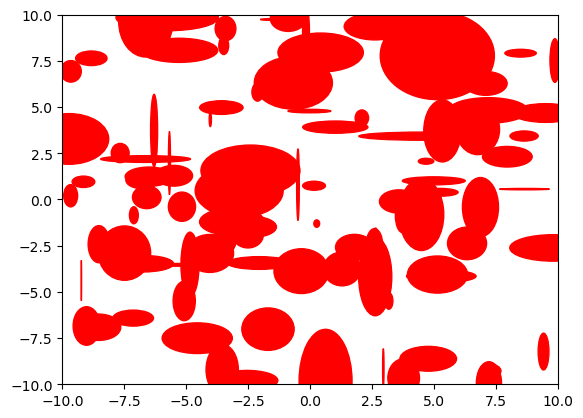

In [10]:
mu = (torch.rand([100, 2]) - 0.5) * 20
sigma = torch.randn([100, 2]) * 2

fig, ax = plt.subplots()

for idx in range(len(mu)):
    ellipse = Ellipse([mu[idx][0], mu[idx][1]], sigma[idx][0], sigma[idx][1], color='r')
    ax.add_patch(ellipse)

plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

In [11]:
def calc_loss(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = ll + kl
    return loss

manager = Manager()
manager.prepare_data()
manager.set_default_model(4, 2)

hist = manager.train(calc_loss, epochs=10)

Now, it is working on cuda:0.


100%|██████████| 10/10 [00:58<00:00,  5.80s/it]


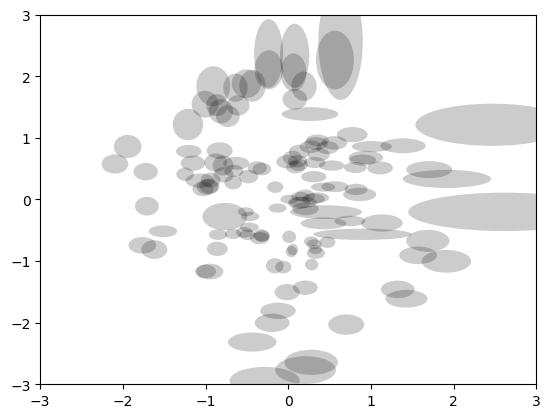

In [17]:
manager.model.to('cpu')

with torch.no_grad():
    for batch, (x, y) in enumerate(manager.train_dataloader):
        h = manager.model.get_submodule("encoder")(x)
        mu = h[:, :2]
        log_sigma = h[:, 2:4]
        sigma = log_sigma.exp()

        fig, ax = plt.subplots()

        for idx in range(len(mu)):
            ellipse = Ellipse([mu[idx][0], mu[idx][1]], sigma[idx][0] * 3, sigma[idx][1] * 3, color='#00000033', linewidth=0)
            ax.add_patch(ellipse)

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.show()
    
        break

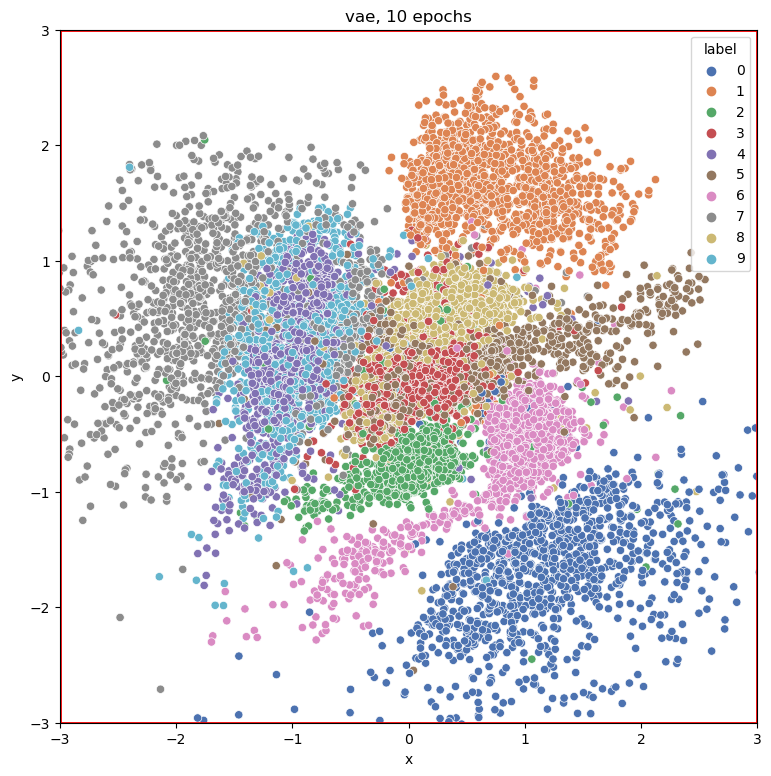

In [34]:
def encode(model, x, y):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    return [mu]

manager.show_latent_space('vae, 10 epochs', encode, xlim=[-3, 3], ylim=[-3, 3])

In [1]:
import torch

In [4]:
d = torch.distributions.Normal(torch.zeros(2), torch.ones(2))
d.sample([100])

tensor([[ 4.7780e-01,  3.9185e-01],
        [-4.8942e-01,  2.6076e-01],
        [-5.0901e-01,  1.0293e+00],
        [-6.8081e-01, -7.8639e-01],
        [-1.9261e+00, -1.1988e+00],
        [ 8.4337e-01,  2.3461e+00],
        [ 1.3111e+00, -1.2832e+00],
        [ 2.9003e-01,  5.5392e-01],
        [ 3.8690e-01, -6.0685e-01],
        [-1.2071e+00, -8.8745e-01],
        [ 8.4388e-01,  6.8465e-01],
        [-2.0909e+00,  5.6989e-01],
        [-1.4621e-01,  5.7706e-01],
        [ 4.5851e-01, -8.6853e-01],
        [ 2.5326e-01, -9.3271e-01],
        [ 5.4187e-02, -1.2545e+00],
        [ 7.9527e-01, -1.9783e+00],
        [-3.4425e-01, -1.5421e+00],
        [-1.6119e-01,  1.0116e+00],
        [-5.7204e-01,  5.7952e-01],
        [-7.8711e-01, -2.0121e+00],
        [ 3.7987e-01,  9.6140e-01],
        [ 4.1806e-01, -1.3182e+00],
        [ 4.4714e-01,  1.4700e+00],
        [ 2.6615e-01,  9.0068e-01],
        [-9.8610e-01,  1.9388e+00],
        [ 7.5108e-01, -1.2279e+00],
        [ 9.3915e-02, -2.176